In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [2]:
X = np.array([[2, 3],
              [3, 2],
              [4, 6],
              [5, 4],
              [6, 7]])
mean_X = np.mean(X, axis=0)
X_meaned = X - mean_X

# Step-2
# covariance, function needs samples as columns
cov_mat = np.cov(X_meaned.T)
cov_mat


array([[2.5, 2.5],
       [2.5, 4.3]])

In [3]:
1/(X.shape[0]-1)*X_meaned.T@X_meaned


array([[2.5, 2.5],
       [2.5, 4.3]])

In [4]:
# Step-3
# A = V * D * V^-1
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
eigen_values, eigen_vectors


(array([0.74293395, 6.05706605]),
 array([[-0.81814408,  0.57501327],
        [ 0.57501327,  0.81814408]]))

In [36]:
from sympy import *
x1, x2, Lambda = symbols('x1 x2 Lambda')
I = eye(2)
A = Matrix(cov_mat)

# print(A.eigenvals())  #returns eigenvalues and their algebraic multiplicity
print(A.eigenvects())  #returns eigenvalues, eigenvects

[(0.742933948882715, 1, [Matrix([
[-0.818144079081656],
[ 0.575013274510797]])]), (6.05706605111728, 1, [Matrix([
[-0.575013274510797],
[-0.818144079081656]])])]


In [52]:
equation = Eq(det(A-Lambda*I), 0)
D = solve(equation)
print([N(element, 4) for element in D]) # Eigenvalus in decimal form
print(pretty(D)) # Eigenvalues in exact form

x1 = D[1]
w1, w2 = symbols('w1 w2')
w = Matrix([[w1],[w2]])
T = cov_mat*w - x1*w # The Ax = %Lambda X with the first %Lambda = D[0]
print(pretty(solve(T,w, dict=True)))
W = linsolve((A,x1*w),(w1,w2))
print(W)


[0.7429, 6.057]
[0.742933948882715, 6.05706605111728]
[{w₁: 0.0, w₂: 0.0}]
{(0, 0)}


In [47]:
D, type(D), w, x1

([0.742933948882715, 6.05706605111728],
 list,
 Matrix([
 [w1],
 [w2]]),
 6.05706605111728)

In [5]:
X_reconstructed = eigen_vectors @ np.diag(eigen_values) @ np.linalg.inv(eigen_vectors)
X_reconstructed


array([[2.5, 2.5],
       [2.5, 4.3]])

In [18]:
# Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
sorted_eigenvalue, sorted_eigenvectors


(array([6.05706605, 0.74293395]),
 array([[ 0.57501327, -0.81814408],
        [ 0.81814408,  0.57501327]]))

In [7]:
num_components = 1
# Step-5
eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
eigenvector_subset


array([[0.57501327],
       [0.81814408]])

In [8]:
# Step-6
X_projected = X_meaned @ eigenvector_subset
X_projected


array([[-2.29542826],
       [-2.53855906],
       [ 1.30903053],
       [ 0.24775564],
       [ 3.27720115]])

In [9]:
X_reconstructed = X_projected @ eigenvector_subset.T + mean_X
X_reconstructed

array([[2.68009828, 2.52200896],
       [2.54029484, 2.32309293],
       [4.75270993, 5.47097557],
       [4.14246278, 4.60269981],
       [5.88443417, 7.08122272]])

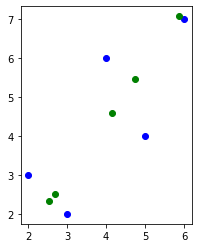

In [10]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='green')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()


In [11]:
def PCA(X, num_components):

    # Step-1
    mean_X = np.mean(X, axis=0)
    X_meaned = X - mean_X

    # Step-2
    # covariance, function needs samples as columns
    cov_mat = np.cov(X_meaned.T)
    # cov_mat = np.cov(X_meaned , rowvar = False)

    # Step-3
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Step-5
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step-6
    X_projected = X_meaned @ eigenvector_subset

    X_reconstructed = X_projected @ eigenvector_subset.T + mean_X

    return X_projected, X_reconstructed


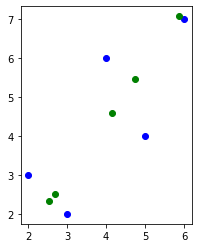

In [12]:
# Applying it to PCA function
X_projected, X_reconstructed = PCA(X, 1)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='green')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()


In [13]:
w0, w1 = 1, 2
N = 10

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = (.5 * np.random.randn(N, 1))
y = w0 + w1 * x + epsilon
X = np.hstack([x,y])
X.shape

(10, 2)

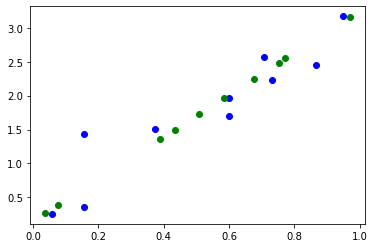

In [14]:
X_projected, X_reconstructed = PCA(X, 1)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='blue')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='green')